### **Análise de dados dos repositórios mais populares do Github utilizando API**

#### **1. Preparação**

In [735]:
# Importação das bibliotecas
import requests
import os
import pandas as pd
import numpy as np
import time

A API do Github está disponível em https://api.github.com/search/repositories 

##### **1.1 Token de acesso**

Para pesquisas mais complexas, é necessário criar um token de acesso, conforme descrito em: <br />
https://docs.github.com/pt/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens#como-criar-um-personal-access-token-classic

**Atenção à política de segurança de seu token!** Para evitar compartilhá-lo por acidente ao fazer commit de um código, é recomendável configurá-lo numa **variável de ambiente**.

In [723]:
# Substitua seu token de acesso abaixo
token = "seu_token_acesso"

# Ou configure-o a partir de uma variável de ambiente
#token = os.environ.get("GITHUB_ACCESS_TOKEN")

if token is None:
    print("Token de acesso não configurado. Configure a variável de ambiente 'GITHUB_ACCESS_TOKEN'.")

<br />

##### **1.2 Fazendo uma requisição à API do Github**

Para fazer requisições à API, utilize a bibliteca *request*. As respostas da API são objetos JSON que devem ser tratados para acessar as informações.

Exemplo de uma requisição GET para os repositórios públicos mais populares do Github e exibição de informações do repositório com maior número de estrelas.

In [725]:
# Requisição GET para buscar os repositórios públicos mais populares
response = requests.get("https://api.github.com/search/repositories?q=stars:>0&sort=stars&order=desc")

if response.status_code == 200:
    data = response.json()
    most_starred_repository = data["items"][0]

    # Nome e número de estrelas
    print("Repositório com mais estrelas:")
    print("Nome:", most_starred_repository["name"])
    print("Número de Estrelas:", most_starred_repository["stargazers_count"])
    print("URL:", most_starred_repository["html_url"])

    # Linguagens utilizadas
    languages_url = most_starred_repository["languages_url"]
    languages_response = requests.get(languages_url)
    if languages_response.status_code == 200:
        languages_data = languages_response.json()

        # Calcular a proporção (em linhas de código) das linguagens utilizadas no repositório
        total_size = sum(languages_data.values())
        language_proportions = {language: size / total_size for language, size in languages_data.items()}
        
        print("Linguagens utilizadas e proporção:")
        for language, proportion in language_proportions.items():
            print(f"{language}: {proportion:.2%}")
    else:
        print("Falha na solicitação de linguagens")

else:
    print("Falha na solicitação GET")



Repositório com mais estrelas:
Nome: freeCodeCamp
Número de Estrelas: 377672
URL: https://github.com/freeCodeCamp/freeCodeCamp
Linguagens utilizadas e proporção:
TypeScript: 62.97%
JavaScript: 30.56%
CSS: 5.83%
Dockerfile: 0.29%
MDX: 0.18%
EJS: 0.07%
Shell: 0.05%
HTML: 0.04%
Less: 0.00%


<br />

#### **2. Extraindo dados a partir da API**

Dados como o número de estrelas, número de forks e branches, data de criação do respositório, etc. podem ser obtidas a partir da API.

Uma informação particularmente interessante são as linguagens de programação utilizadas nos repositórios mais populares, pois podem indicar tendências na comunidade, desenvolvimento de novas ferramentas, ou como os desenvolvedores estão integrando linguagens para criar projetos complexos.

Para fazer requisições maiores (mais dados) e mais complexas à API, será necessário o uso do token e é recomendável paginar a resposta.

In [ ]:
per_page = 50

# Requisição GET para buscar os 50 repositórios públicos mais populares
response = requests.get(f"https://api.github.com/search/repositories?q=stars:>0&sort=stars&order=desc&per_page={per_page}", headers={"Authorization": f"token {token}"})

if response.status_code == 200:
    data = response.json()
    popular_repositories = data["items"]
    nocode = 0

    for index, repository in enumerate(popular_repositories, start=1):
        print(f"Repositório #{index} com mais estrelas:")
        print("Nome:", repository["name"])
        print("Número de Estrelas:", repository["stargazers_count"])
        print("URL:", repository["html_url"])

        # Verifica se a URL de linguagens está disponível
        if "languages_url" in repository:
            languages_url = repository["languages_url"]
            languages_response = requests.get(languages_url, headers={"Authorization": f"token {token}"})
            if languages_response.status_code == 200:
                languages_data = languages_response.json()
                used_languages = list(languages_data.keys())

                if len(used_languages) == 0:
                    print("Nenhuma linguagem de programação detectada. Não é um repositório de código-fonte.")
                    nocode += 1
                else:
                    print("Linguagens utilizadas:", used_languages)

                    # Calcula a proporção de linguagens
                    total_size = sum(languages_data.values())
                    language_proportions = {language: size / total_size for language, size in languages_data.items()}
                
                    print("Linguagens utilizadas e proporção:")
                    for language, proportion in language_proportions.items():

                        #Considera somente linguagens utilizadas em pelo menos 5% do código no repositório
                        if proportion >= 0.05:
                            print(f"{language}: {proportion:.0%}")
            else:
                print(f"Falha na solicitação de linguagens. Erro: {languages_response.status_code}")
        else:
            print("URL de linguagens não disponível para este repositório")

        print()  
else:
    print("Falha na solicitação GET")

print(f"Total de repositórios sem código-fonte: {nocode}")


Repositório #1 com mais estrelas:
Nome: free-programming-books
Número de Estrelas: 302512
URL: https://github.com/EbookFoundation/free-programming-books
Nenhuma linguagem de programação detectada. Não é um repositório de código-fonte.

Repositório #2 com mais estrelas:
Nome: awesome
Número de Estrelas: 275917
URL: https://github.com/sindresorhus/awesome
Nenhuma linguagem de programação detectada. Não é um repositório de código-fonte.

Repositório #3 com mais estrelas:
Nome: coding-interview-university
Número de Estrelas: 270422
URL: https://github.com/jwasham/coding-interview-university
Nenhuma linguagem de programação detectada. Não é um repositório de código-fonte.

Repositório #4 com mais estrelas:
Nome: 996.ICU
Número de Estrelas: 268107
URL: https://github.com/996icu/996.ICU
Nenhuma linguagem de programação detectada. Não é um repositório de código-fonte.

Repositório #5 com mais estrelas:
Nome: developer-roadmap
Número de Estrelas: 256510
URL: https://github.com/kamranahmedse/dev

Como o resultado acima mostrou, o Github não utilizado apenas por desenvolvedores. Há repositórios que não voltados para o desenvolimento de código-fonte.

No momento em que foi realizada esta consulta, dentre os 50 repositórios mais populares, 12 eram voltados para compartilhamento de outras medias (ebooks, questionários, etc.)

<br />

##### **2.1 Extraindo dados de forma automatizada**

A abaixo foi construída para permitir a extração de grandes quantidades de dados da API do Github usando paginação dos resultados e processando-os num DataFrame do Pandas. Pode ser utilizada para obter resultados ordenados por diversas métricas.

In [728]:
def get_github_data(url_request, per_page, start_page, end_page):
    """
    Recupera dados de repositórios populares do GitHub a partir da API.

    Parâmetros:
    url_request (str): O URL da API do GitHub para recuperação de dados.
    per_page (int): O número de resultados por página.
    start_page (int): A página de início para recuperação de dados.
    end_page (int): A última página para recuperação de dados.
    token (str): O token de autenticação para acessar a API.

    Retorna:
    pandas.DataFrame: Um DataFrame contendo informações de repositórios, incluindo proprietário,
    nome, estrelas, URL, data de criação, contagem de branches, contagem de forks, linguagens usadas
    e proporções de uso das linguagens.
    """
    owners = []
    names = []
    stars = []
    urls = []
    created_dates = []
    branch_counts = []
    forks_counts = []
    languages = []
    languages_proportions = []

    for page in range(start_page, end_page + 1):
        response = requests.get(
            url_request.format(per_page=per_page, page=page),
            headers={"Authorization": f"token {token}"}
        )

        if response.status_code == 200:
            data = response.json()
            popular_repositories = data["items"]

            for repository in popular_repositories:
                owners.append(repository["owner"]["login"])
                names.append(repository["name"])
                stars.append(repository["stargazers_count"])
                urls.append(repository["html_url"])
                created_dates.append(repository["created_at"][:10])

                branches_url = repository["branches_url"].replace("{/branch}", "")
                branches_response = requests.get(branches_url, headers={"Authorization": f"token {token}"})
                if branches_response.status_code == 200:
                    branches_data = branches_response.json()
                    num_branches = len(branches_data)
                    branch_counts.append(num_branches)
                else:
                    branch_counts.append(None)

                forks_count = repository["forks_count"]
                forks_counts.append(forks_count)

                if "languages_url" in repository:
                    languages_url = repository["languages_url"]
                    languages_response = requests.get(languages_url, headers={"Authorization": f"token {token}"})
                    if languages_response.status_code == 200:
                        languages_data = languages_response.json()
                        used_languages = list(languages_data.keys())
                        languages.append(used_languages)

                        total_size = sum(languages_data.values())
                        language_proportions = {language: size / total_size for language, size in languages_data.items()}
                        languages_proportions.append(language_proportions)
                    else:
                        languages.append(None)
                        languages_proportions.append(None)
                else:
                    languages.append(None)
                    languages_proportions.append(None)
        else:
            print(f"Falha na solicitação GET da página {page}. Status code: {response.status_code}")

    data_dict = {
        "Owner": owners,
        "Name": names,
        "Stars": stars,
        "URL": urls,
        "Created Date": created_dates,
        "Branch Count": branch_counts,
        "Forks Count": forks_counts,
        "Languages": languages,
        "Languages Proportions": languages_proportions
    }

    df = pd.DataFrame(data_dict)
    return df

<br />

Exemplo de uso da função:

**Pesquisando os 50 repositórios mais populares (em número de estrelas - *stars*) e paginando a resposta.**

In [ ]:
url_request = "https://api.github.com/search/repositories?q=stars:>0&sort=stars&order=desc&per_page={per_page}&page={page}"
df_stars = get_github_data(url_request,50,1,2)
df_stars.head(10)

,Owner,Name,Stars,URL,Created Date,Branch Count,Forks Count,Languages,Languages Proportions
0,freeCodeCamp,freeCodeCamp,377454,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24,6,34692,"[TypeScript, JavaScript, CSS, Dockerfile, MDX,...","{'TypeScript': 0.6288988578656082, 'JavaScript..."
1,EbookFoundation,free-programming-books,302513,https://github.com/EbookFoundation/free-progra...,2013-10-11,29,58448,[],{}
2,sindresorhus,awesome,275927,https://github.com/sindresorhus/awesome,2014-07-11,2,26673,[],{}
3,jwasham,coding-interview-university,270428,https://github.com/jwasham/coding-interview-un...,2016-06-06,1,70350,[],{}
4,996icu,996.ICU,268108,https://github.com/996icu/996.ICU,2019-03-26,1,21479,[],{}
5,kamranahmedse,developer-roadmap,256512,https://github.com/kamranahmedse/developer-roa...,2017-03-15,30,35369,"[TypeScript, Astro, JavaScript, CSS, Shell]","{'TypeScript': 0.7866722394538669, 'Astro': 0...."
6,codecrafters-io,build-your-own-x,223961,https://github.com/codecrafters-io/build-your-...,2018-05-09,1,21653,[],{}
7,facebook,react,214881,https://github.com/facebook/react,2013-05-24,30,45294,"[JavaScript, HTML, CSS, C++, TypeScript, Coffe...","{'JavaScript': 0.9372443691560142, 'HTML': 0.0..."
8,vinta,awesome-python,185508,https://github.com/vinta/awesome-python,2014-06-27,2,24037,"[Python, Makefile]","{'Python': 0.9258448060075094, 'Makefile': 0.0..."
9,getify,You-Dont-Know-JS,172656,https://github.com/getify/You-Dont-Know-JS,2013-11-16,6,33205,[],{}


<br />

Exemplo 2 de uso da função:

**Pesquisando os 100 repositórios mais populares (em número de ramificações - *forks*) e paginando a resposta.**

In [ ]:
url_request = "https://api.github.com/search/repositories?q=forks:>0&sort=forks&order=desc&per_page={per_page}&page={page}"
df_forks = get_github_data(url_request, 100, 1, 4)
df_forks.head(5)

,Owner,Name,Stars,URL,Created Date,Branch Count,Forks Count,Languages,Languages Proportions
0,jtleek,datasharing,6396,https://github.com/jtleek/datasharing,2013-11-07,1,243429,[],{}
1,rdpeng,ProgrammingAssignment2,805,https://github.com/rdpeng/ProgrammingAssignment2,2014-01-14,1,142891,[R],{'R': 1.0}
2,octocat,Spoon-Knife,11908,https://github.com/octocat/Spoon-Knife,2011-01-27,3,139675,"[HTML, CSS]","{'HTML': 0.5810147299509002, 'CSS': 0.41898527..."
3,SmartThingsCommunity,SmartThingsPublic,2510,https://github.com/SmartThingsCommunity/SmartT...,2015-08-04,30,90867,"[Groovy, Shell]","{'Groovy': 0.9998780908392617, 'Shell': 0.0001..."
4,tensorflow,tensorflow,178578,https://github.com/tensorflow/tensorflow,2015-11-07,30,89087,"[C++, Python, MLIR, Starlark, HTML, Go, C, Jav...","{'C++': 0.5642925089823755, 'Python': 0.269697..."


<br />

A API do Github pode apresentar instabilidades, o que resultar em resultados diferentes para a mesma consulta. Por exemplo, ao pesquisar repetidas vezes pelos 50 repositórios mais populares, não necessariamente as respostas às requisições serão idênticas, pois algum repositório pode estar ausente e ser substituído por outro.

A fim de evitar inconsistências nos dados extraídos, utilizou-se réplicas das requisições. Assim, por exemplo, ao extrair 3x os 1000 repositórios mais populares, há uma maior garantia de que de fato os 1000 mais populares forma de fato amostrados.

Os códigos abaixo foram utilizados para:

- obter múltiplas amostras dos 1000 repositórios mais populares (em estrelas ou ramificações) de forma automatizada,
- concatenar todos os resultados num único DataFrame,
- remover os registros duplicados,
- ordenar os registros segundo a métrica escolhida,
- limitar o DataFrame final aos 1000 repositórios mais populares,
- exportar a base de dados extraída.



In [ ]:
per_page = 25
loops = 3  # Número de vezes que o processo será repetido

for i in range(1, loops + 1):

    start_page = 1
    end_page = 4

    for j in range(1, 4):

        url_request = f"https://api.github.com/search/repositories?q=forks:>0&sort=forks&order=desc&per_page={per_page}&page={start_page}"

        print(url_request)

        df_name = f"df_stars{i}_{j}"

        # Atribuir o nome padronizado ao df
        globals()[df_name] = get_github_data(url_request, per_page, start_page, end_page)

        start_page += 4
        end_page += 4 
        print(f"{df_name} ok")

        # Aguarda 60s para fazer uma nova requisição - evita da API recusar uma nova consulta
        time.sleep(60)

In [ ]:
# Cria uma lista para armazenar os DataFrames com nomes padronizados criados acima
df_list = []

for i in range(1, 11):
    df_name = f'df_stars{i}'
    if df_name in locals():
        df = locals()[df_name]  # Obtém o DataFrame com o nome definido em df_name
        df_list.append(df)      # Adiciona o DataFrame à lista

# Concatena todos os DataFrames num único
df_stars1000 = pd.concat(df_list, ignore_index=True)

# Ordena os registros e remove os duplicados
df_stars1000 = df_stars.sort_index(ascending= False)
df_stars1000 = df_stars1000.drop_duplicates(subset='URL', keep='first')
df_stars1000 = df_stars.sort_index(ascending= True)
df_stars1000 = df_stars1000.iloc[:1000]

In [737]:
# Ao fim do processo, o DataFrame contém apenas os registros dos 1000 repositórios mais populares
df_stars1000.shape

(1000, 9)

In [ ]:
# Exporta o DataFrame tratado para um arquivo CSV
df_stars1000.to_csv('stars1000.csv', index=False)

In [ ]:
# Supondo que você tenha três DataFrames df1, df2 e df3
# Vamos criar conjuntos com os URLs dos repositórios em cada DataFrame
urls_df1 = set(df_stars['URL'])
urls_df2 = set(df_forks['URL'])
urls_df3 = set(df_colabs['URL'])

# Encontre a interseção dos conjuntos para encontrar os repositórios presentes em todos os DataFrames
repositorios_comuns_tres_metricas = urls_df1.intersection(urls_df2, urls_df3)
repositorios_comuns_stars_forks = urls_df1.intersection(urls_df2)
repositorios_comuns_stars_colabs = urls_df1.intersection(urls_df3)
repositorios_comuns_forks_colabs = urls_df2.intersection(urls_df3)

# Os repositórios comuns estão na lista repositorios_comuns_lista
print(f'Repositórios comuns nas três métricas {len(repositorios_comuns_tres_metricas)}')
print(f'Repositórios comuns nas duas métricas (stars e forks): {len(repositorios_comuns_stars_forks)}')
print(f'Repositórios comuns nas duas métricas (stars e colabs): {len(repositorios_comuns_stars_colabs)}')
print(f'Repositórios comuns nas duas métricas (forks e colabs): {len(repositorios_comuns_forks_colabs)}')

Repositórios comuns nas três métricas 0
Repositórios comuns nas duas métricas (stars e forks): 29
Repositórios comuns nas duas métricas (stars e colabs): 0
Repositórios comuns nas duas métricas (forks e colabs): 0


Tentativa 1000

In [734]:
df_stars1000.shape

(1000, 9)

In [731]:
def most_common_languages(df):
    all_languages = df['Languages'].explode()

    # Conte a frequência de cada linguagem
    language_counts = all_languages.value_counts()

    # Classifique as linguagens por frequência em ordem decrescente
    sorted_languages = language_counts.sort_values(ascending=False)

    # Exiba as 10 principais linguagens
    top_languages = sorted_languages.head(10)
    print(top_languages)

In [732]:
def most_used_languages(df):
    # Inicialize um dicionário vazio para armazenar as somas das proporções
    total_language_proportions = {}

    # Percorra as linhas do DataFrame
    for index, row in df.iterrows():
        languages_proportions = row['Languages Proportions']

        # Verifique se as proporções de linguagem estão disponíveis
        if languages_proportions:
            # Percorra as proporções de linguagem no dicionário
            for language, proportion in languages_proportions.items():
                # Adicione a proporção ao total da linguagem
                if language in total_language_proportions:
                    total_language_proportions[language] += proportion
                else:
                    total_language_proportions[language] = proportion

    # Calcule o valor total das proporções
    total_proportion = sum(total_language_proportions.values())

    # Crie um dicionário de proporções em porcentagem
    percent_language_proportions = {language: (proportion / total_proportion) * 100 for language, proportion in total_language_proportions.items()}

    # Crie uma Série a partir do dicionário com as proporções em porcentagem
    percent_language_series = pd.Series(percent_language_proportions)

    # Classifique as linguagens com base nas porcentagens em ordem decrescente
    sorted_percent_language_series = percent_language_series.sort_values(ascending=False)

    # Exiba as linguagens ordenadas pelas porcentagens
    #print(sorted_percent_language_series)

    print()

    # Exiba as linguagens ordenadas pelas porcentagens com formato
    print(sorted_percent_language_series.head(15).apply(lambda x: f"{x:.3f}%"))

In [ ]:
df_stars1000.shape

(1000, 9)

In [ ]:
most_common_languages(df_stars1000)

Shell         532
JavaScript    492
HTML          440
Python        348
CSS           331
Dockerfile    286
Makefile      258
TypeScript    237
C++           163
C             159
Name: Languages, dtype: int64


In [ ]:
df_forks1000 = df_forks.sort_index(ascending= False)

In [ ]:
df_forks1000.head()

,Owner,Name,Stars,URL,Created Date,Branch Count,Forks Count,Languages,Languages Proportions
0,jtleek,datasharing,6396,https://github.com/jtleek/datasharing,2013-11-07,1,243433,[],{}
1,rdpeng,ProgrammingAssignment2,805,https://github.com/rdpeng/ProgrammingAssignment2,2014-01-14,1,142898,[R],{'R': 1.0}
2,octocat,Spoon-Knife,11910,https://github.com/octocat/Spoon-Knife,2011-01-27,3,139676,"[HTML, CSS]","{'HTML': 0.5810147299509002, 'CSS': 0.41898527..."
3,SmartThingsCommunity,SmartThingsPublic,2510,https://github.com/SmartThingsCommunity/SmartT...,2015-08-04,30,90864,"[Groovy, Shell]","{'Groovy': 0.9998780908392617, 'Shell': 0.0001..."
4,tensorflow,tensorflow,178593,https://github.com/tensorflow/tensorflow,2015-11-07,30,89100,"[C++, Python, MLIR, Starlark, HTML, Go, C, Jav...","{'C++': 0.5642925089823755, 'Python': 0.269697..."


In [ ]:
df_forks1000 = df_forks1000.drop_duplicates(subset='URL', keep='first')

In [ ]:
df_forks1000 = df_forks.sort_index(ascending= True)

In [ ]:
df_forks1000 = df_forks1000.iloc[:1000]

In [ ]:
df_forks1000.shape

(1000, 9)

In [ ]:
# Exportando as bases de dados para CSV
df_stars1000.to_csv('stars1000.csv', index=False)
df_forks1000.to_csv('forks1000.csv', index=False)

In [ ]:
most_common_languages(df_stars1000)

Shell         532
JavaScript    492
HTML          440
Python        348
CSS           331
Dockerfile    286
Makefile      258
TypeScript    237
C++           163
C             159
Name: Languages, dtype: int64


In [ ]:
most_common_languages(df_forks1000)

JavaScript    483
HTML          462
Shell         436
Python        349
CSS           329
Dockerfile    249
Java          197
Makefile      182
C++           145
TypeScript    145
Name: Languages, dtype: int64


In [ ]:
most_used_languages(df_stars1000)


JavaScript          18.635%
Python              14.863%
TypeScript          12.338%
Go                   8.498%
Java                 6.856%
C++                  5.683%
C                    3.550%
HTML                 3.547%
Jupyter Notebook     2.847%
Shell                2.736%
Rust                 2.388%
Swift                1.502%
CSS                  1.469%
Vue                  1.398%
PHP                  1.250%
dtype: object


In [ ]:
most_used_languages(df_forks1000)


JavaScript          22.062%
Python              13.460%
Java                11.795%
HTML                 7.774%
TypeScript           6.062%
Jupyter Notebook     5.818%
C++                  5.072%
Go                   4.156%
CSS                  3.056%
C                    2.728%
Shell                2.396%
Ruby                 1.688%
PHP                  1.443%
Kotlin               1.261%
C#                   0.918%
dtype: object


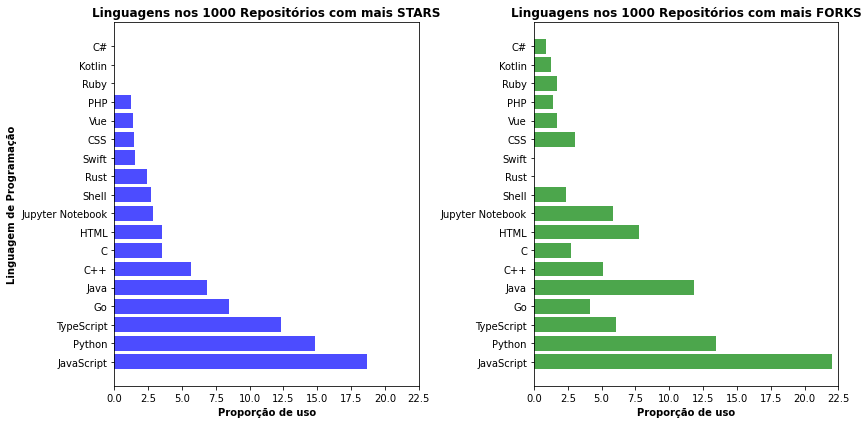

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
stars_data = {
    'Language': ['JavaScript', 'Python', 'TypeScript', 'Go', 'Java', 'C++', 'C', 'HTML', 'Jupyter Notebook', 'Shell', 'Rust', 'Swift', 'CSS', 'Vue', 'PHP', 'Ruby', 'Kotlin', 'C#'],
    'Percentage': [18.635, 14.863, 12.338, 8.498, 6.856, 5.683, 3.550, 3.547, 2.847, 2.736, 2.388, 1.502, 1.469, 1.398, 1.250, 0.0, 0.0, 0.0]
}

forks_data = {
    'Language': ['JavaScript', 'Python', 'TypeScript', 'Go', 'Java', 'C++', 'C', 'HTML', 'Jupyter Notebook', 'Shell', 'Rust', 'Swift', 'CSS', 'Vue', 'PHP', 'Ruby', 'Kotlin', 'C#'],
    'Percentage': [22.062, 13.460, 6.062, 4.156, 11.795, 5.072, 2.728, 7.774, 5.818, 2.396, 0.0, 0.0, 3.056, 1.688, 1.443, 1.688, 1.261, 0.918]
}

# Crie DataFrames a partir dos dados
stars_df = pd.DataFrame(stars_data)
forks_df = pd.DataFrame(forks_data)

# Ordene os DataFrames pela ordem de 'stars_df'
forks_df = forks_df[forks_df['Language'].isin(stars_df['Language'])]
forks_df = forks_df.reindex(stars_df.index)

# Crie dois gráficos de barras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para 'Stars'
axes[0].barh(stars_df['Language'], stars_df['Percentage'], color='b', alpha=0.7)
axes[0].set_xlabel('Proporção de uso', fontweight='bold')
axes[0].set_ylabel('Linguagem de Programação', fontweight='bold')
axes[0].set_title('Linguagens nos 1000 Repositórios com mais STARS', fontweight='bold')
# Defina o tamanho do eixo x para 22.5
axes[0].set_xlim([0, 22.5])

# Gráfico para 'Forks'
axes[1].barh(forks_df['Language'], forks_df['Percentage'], color='g', alpha=0.7)
axes[1].set_xlabel('Proporção de uso', fontweight='bold')
#axes[1].set_ylabel('Languages')
axes[1].set_title('Linguagens nos 1000 Repositórios com mais FORKS', fontweight='bold')
axes[1].set_xlim([0, 22.5])

# Ajuste os espaços entre os gráficos
plt.tight_layout()

# Mostre os gráficos
plt.show()


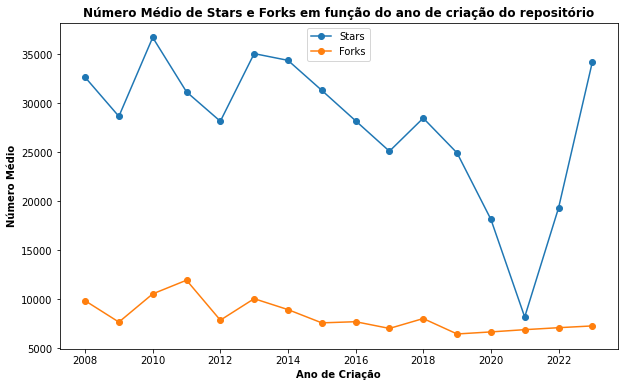

In [719]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha um DataFrame chamado df com os dados fornecidos

# Converta a coluna 'Created Date' para o tipo datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Crie uma nova coluna 'Year' com o ano da data de criação
df['Year'] = df['Created Date'].dt.year

# Calcule o número médio de "stars" e "forks" por ano
stars_mean = df.groupby('Year')['Stars'].mean()
forks_mean = df.groupby('Year')['Forks Count'].mean()

# Crie um gráfico de linhas para mostrar os números médios
plt.figure(figsize=(10, 6))
plt.plot(stars_mean.index, stars_mean.values, label='Stars', marker='o')
plt.plot(forks_mean.index, forks_mean.values, label='Forks', marker='o')

# Adicione rótulos de eixo e um título
plt.xlabel('Ano de Criação', fontweight='bold')
plt.ylabel('Número Médio', fontweight='bold')
plt.title('Número Médio de Stars e Forks em função do ano de criação do repositório', fontweight='bold')

# Legenda das curvas
plt.legend(fontsize=16)
plt.legend(loc='upper center')

# Exiba o gráfico
plt.show()



In [707]:
print(df.query('Year >= 2022').sort_values('Stars', ascending = False)[['Year', 'Owner', 'Name' , 'Stars']].head(20))

     Year                 Owner                        Name   Stars
16   2023  Significant-Gravitas                     AutoGPT  152367
208  2022                     f     awesome-chatgpt-prompts   91760
47   2022          langchain-ai                   langchain   66944
99   2023              base-org                        node   64365
105  2022               CompVis            stable-diffusion   61098
111  2023               twitter               the-algorithm   60082
149  2023              nomic-ai                     gpt4all   54173
413  2022                openai             openai-cookbook   49849
222  2023                xtekky                    gpt4free   47967
23   2023               Yidadaa            ChatGPT-Next-Web   47684
857  2022                openai                     whisper   47272
505  2023            AntonOsika                gpt-engineer   45358
152  2022                PlexPt  awesome-chatgpt-prompts-zh   44912
752  2023          binary-husky                g

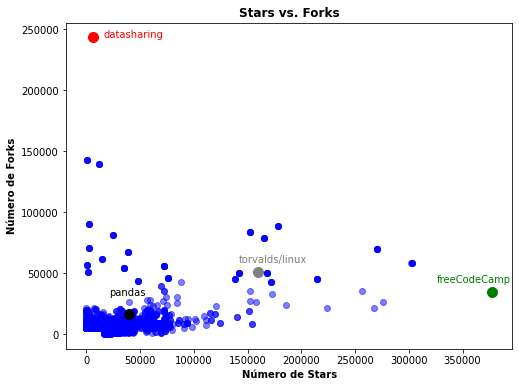

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha os DataFrames df_stars1000 e df_forks1000

# Concatene os DataFrames em um novo DataFrame chamado combined
combined = pd.concat([df_stars1000, df_forks1000], axis=1)

# Crie um gráfico de dispersão (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(combined['Stars'], combined['Forks Count'], c='b', alpha=0.5, marker='o')

# Destacando 'freeCodeCamp'
x_point = 377454
y_point = 34692
plt.scatter(x_point, y_point, c='g', marker='o', s=100)
plt.annotate('freeCodeCamp', (x_point, y_point), xytext=(-55, 10), textcoords='offset points', color='g')

x_point = 6396
y_point = 243433
plt.scatter(x_point, y_point, c='r', marker='o', s=100)
plt.annotate('datasharing', (x_point, y_point), xytext=(10, 0), textcoords='offset points', color='r')

x_point = 40220
y_point = 16880
plt.scatter(x_point, y_point, c='black', marker='o', s=100)
plt.annotate('pandas', (x_point, y_point), xytext=(-20, 18), textcoords='offset points', color='black')

x_point = 160200
y_point = 50918
plt.scatter(x_point, y_point, c='gray', marker='o', s=100)
plt.annotate('torvalds/linux', (x_point, y_point), xytext=(-20, 10), textcoords='offset points', color='gray') 


# Adicione rótulos de eixo e um título
plt.xlabel('Número de Stars', fontweight='bold')
plt.ylabel('Número de Forks', fontweight='bold')
plt.title('Stars vs. Forks', fontweight='bold')

# Exiba o gráfico
plt.show()



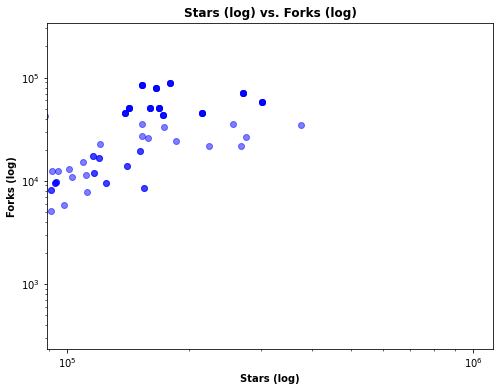

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha os DataFrames df_stars1000 e df_forks1000

# Concatene os DataFrames em um novo DataFrame chamado combined
combined = pd.concat([df_stars1000, df_forks1000], axis=1)

# Crie um gráfico de dispersão (scatter plot) com escala logarítmica em ambos os eixos
plt.figure(figsize=(8, 6))
plt.scatter(combined['Stars'], combined['Forks Count'], c='b', alpha=0.5, marker='o')

# Defina escala logarítmica para os eixos x e y
plt.xscale('log')
plt.yscale('log')

# Adicione rótulos de eixo e um título
plt.xlabel('Stars (log)', fontweight='bold')
plt.ylabel('Forks (log)', fontweight='bold')
plt.title('Stars (log) vs. Forks (log)', fontweight='bold')

# Exiba o gráfico
plt.show()

In [579]:
correlation = df_stars1000['Stars'].corr(df_forks1000['Forks Count'])

# Exiba o valor da correlação
print(f"Correlation between Stars and Forks Count: {correlation}")

Correlation between Stars and Forks Count: 0.6982711725969409


In [630]:
df_stars1000.iloc[7:9]

,Owner,Name,Stars,URL,Created Date,Branch Count,Forks Count,Languages,Languages Proportions
7,facebook,react,214881,https://github.com/facebook/react,2013-05-24,30,45294,"[JavaScript, HTML, CSS, C++, TypeScript, Coffe...","{'JavaScript': 0.9372443691560142, 'HTML': 0.0..."
8,vinta,awesome-python,185508,https://github.com/vinta/awesome-python,2014-06-27,2,24037,"[Python, Makefile]","{'Python': 0.9258448060075094, 'Makefile': 0.0..."


In [636]:
import pandas as pd

df = df_stars1000.copy()

# Converta a coluna 'Created Date' para o tipo datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Crie uma nova coluna 'Year' com o ano da data de criação
df['Year'] = df['Created Date'].dt.year

# Inicialize um dicionário para armazenar as médias de 'Python' por ano
python_averages = {}

# Itere sobre o DataFrame e calcule a média de 'Python' por ano
for year, group in df.groupby('Year'):
    python_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('Python', 0)).mean()

# Exiba as médias de 'Python' por ano
for year, average in python_averages.items():
    print(f'Ano {year}: Média de Python = {100*average:.2f}%')


Ano 2008: Média de Python = 0.00%
Ano 2009: Média de Python = 0.03%
Ano 2010: Média de Python = 19.00%
Ano 2011: Média de Python = 8.43%
Ano 2012: Média de Python = 10.41%
Ano 2013: Média de Python = 1.42%
Ano 2014: Média de Python = 6.91%
Ano 2015: Média de Python = 11.62%
Ano 2016: Média de Python = 11.37%
Ano 2017: Média de Python = 15.83%
Ano 2018: Média de Python = 13.48%
Ano 2019: Média de Python = 16.05%
Ano 2020: Média de Python = 23.33%
Ano 2021: Média de Python = 3.78%
Ano 2022: Média de Python = 55.54%
Ano 2023: Média de Python = 42.52%


In [641]:
import pandas as pd

df = df_stars1000.copy()

# Converta a coluna 'Created Date' para o tipo datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Crie uma nova coluna 'Year' com o ano da data de criação
df['Year'] = df['Created Date'].dt.year

# Inicialize um dicionário para armazenar as médias de 'Python' por ano
python_averages = {}

# Itere sobre o DataFrame e calcule a média de 'Python' por ano
for year, group in df.groupby('Year'):
    python_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('Python', 0)).mean()

# Exiba as médias de 'Python' por ano
for year, average in python_averages.items():
    print(f'Ano {year}: Média de Python = {100*average:.2f}%')

Ano 2008: Média de Python = 0.00%
Ano 2009: Média de Python = 0.03%
Ano 2010: Média de Python = 19.00%
Ano 2011: Média de Python = 8.43%
Ano 2012: Média de Python = 10.41%
Ano 2013: Média de Python = 1.42%
Ano 2014: Média de Python = 6.91%
Ano 2015: Média de Python = 11.62%
Ano 2016: Média de Python = 11.37%
Ano 2017: Média de Python = 15.83%
Ano 2018: Média de Python = 13.48%
Ano 2019: Média de Python = 16.05%
Ano 2020: Média de Python = 23.33%
Ano 2021: Média de Python = 3.78%
Ano 2022: Média de Python = 55.54%
Ano 2023: Média de Python = 42.52%


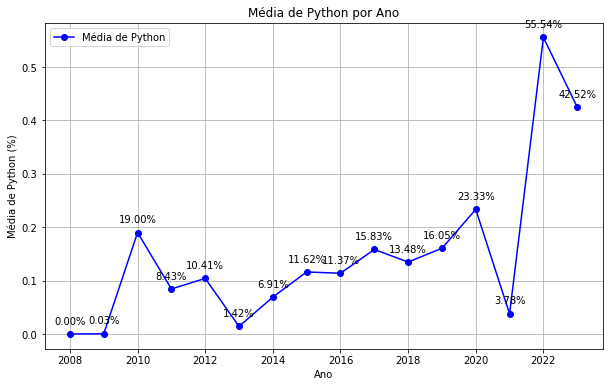

In [642]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame df com as médias de Python por ano

# Crie um novo DataFrame com os resultados
data = {
    'Ano': list(python_averages.keys()),
    'Media_Python': list(python_averages.values())
}

df_resultados = pd.DataFrame(data)

# Crie um gráfico de linhas e pontos
plt.figure(figsize=(10, 6))
plt.plot(df_resultados['Ano'], df_resultados['Media_Python'], marker='o', linestyle='-', color='b', label='Média de Python')

# Adicione rótulos de eixo e um título
plt.xlabel('Ano')
plt.ylabel('Média de Python (%)')
plt.title('Média de Python por Ano')
plt.grid(True)

# Exiba pontos específicos no gráfico
for i, row in df_resultados.iterrows():
    plt.annotate(f'{100*row["Media_Python"]:.2f}%', (row['Ano'], row['Media_Python']), textcoords="offset points", xytext=(0,10), ha='center')

# Exiba a legenda
plt.legend()

# Exiba o gráfico
plt.show()


In [644]:
js_averages = {}
java_averages = {}
ts_averages = {}
go_averages = {}
c2mais_averages = {}

for year, group in df.groupby('Year'):
    js_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('JavaScript', 0)).mean()
    java_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('Java', 0)).mean()
    ts_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('TypeScript', 0)).mean()
    go_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('Go', 0)).mean()
    c2mais_averages[year] = group['Languages Proportions'].apply(lambda x: x.get('C++', 0)).mean()



SyntaxError: invalid syntax (<ipython-input-649-fc58893ee6b2>, line 1)

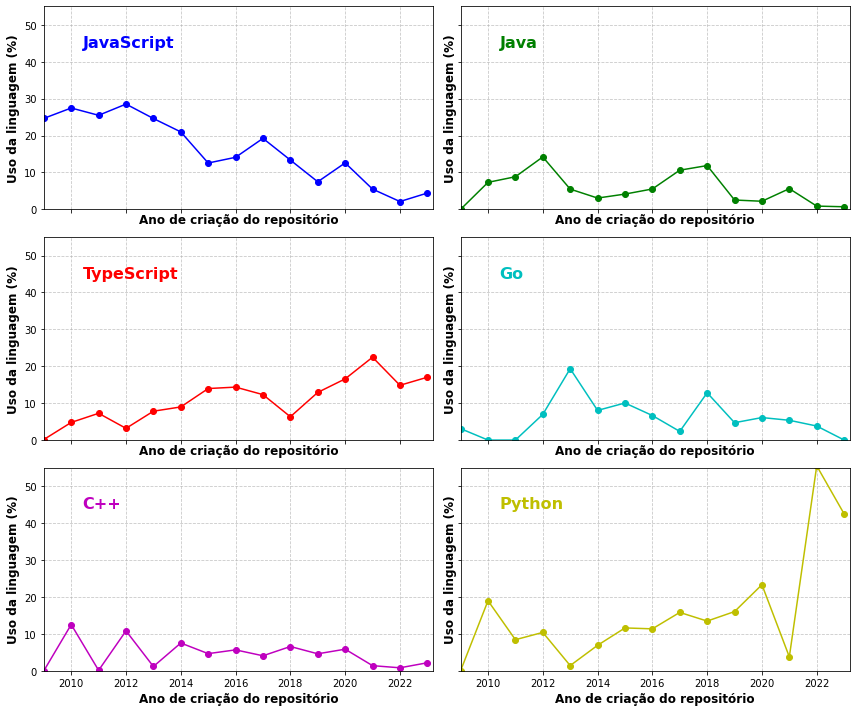

In [675]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha os dicionários js_averages, java_averages, ts_averages, go_averages, c2mais_averages e python_averages

# Crie um DataFrame com os resultados
data = {
    'Ano': list(js_averages.keys()),
    'JavaScript': list(js_averages.values()),
    'Java': list(java_averages.values()),
    'TypeScript': list(ts_averages.values()),
    'Go': list(go_averages.values()),
    'C++': list(c2mais_averages.values()),
    'Python': list(python_averages.values())
}

df_resultados = pd.DataFrame(data)

# Crie gráficos separados para cada linguagem com a mesma escala
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), sharex=True, sharey=True)

# Defina as cores para cada linguagem
cores = ['b', 'g', 'r', 'c', 'm', 'y']

# Defina o tamanho da legenda
legenda_fontsize = 16

# Defina a mesma escala para todos os gráficos
for row in axes:
    for ax in row:
        ax.set_xlim(2009, 2023.2)
        ax.set_ylim(0, 55)
        ax.set_xlabel('Ano de criação do repositório', fontweight='bold', fontsize = 12)
        ax.set_ylabel('Uso da linguagem (%)', fontweight='bold', fontsize = 12)
        ax.grid(True, linestyle='--', alpha=0.7)

# Plote os gráficos individuais
for i, linguagem in enumerate(['JavaScript', 'Java', 'TypeScript', 'Go', 'C++', 'Python']):
    row = i // 2
    col = i % 2
    axes[row, col].plot(df_resultados['Ano'], 100*df_resultados[linguagem], marker='o', linestyle='-', color=cores[i])
    label = linguagem
    axes[row, col].annotate(label, xy=(0.1, 0.8), xycoords='axes fraction', color=cores[i], fontweight='bold', fontsize=legenda_fontsize)

# Ajuste os espaços entre os subgráficos para evitar sobreposição de rótulos
plt.tight_layout()

# Exiba os gráficos
plt.show()
